# Viral genes-progeny relationship
This notebook plots the number of viral genes found in cells that produce or do not produce viral progeny

Import python modules:


In [1]:
from IPython.display import display

from dms_variants.constants import CBPALETTE

import pandas as pd

import plotnine as p9

Hardcode variables for now:

In [2]:
viral_genes_by_cell_csv = 'results/viral_fastq10x/scProgenyProduction_trial3_viral_genes_by_cell.csv.gz'
contributes_progeny_by_cell_csv = 'results/viral_fastq10x/scProgenyProduction_trial3_contributes_progeny_by_cell.csv.gz'
expt = 'scProgenyProduction_trial3'
plot = 'results/viral_progeny/scProgenyProduction_trial3_viral_genes_progeny_relationship.pdf'

Style parameters. *N.b.* `CBPALETTE` is defined in imports above.

In [3]:
p9.theme_set(p9.theme_classic())

## Load data
Load data on viral genes in each infected cell and whether each infected cell contributes progeny.

*N.b. viral genes CSV contains info on every cell (both infected and uninfected) in transcriptome*

In [4]:
viral_genes = pd.read_csv(viral_genes_by_cell_csv)
display(viral_genes)

,cell_barcode,gene,frac_gene_UMIs,gene_present
0,AAACCCAGTAACAAGT,fluPB2,0.000000,False
1,AAACCCATCATTGCTT,fluPB2,0.000011,True
2,AAACGAAAGATGTTGA,fluPB2,0.000000,False
3,AAACGAAGTACTTCCC,fluPB2,0.002816,True
4,AAACGAAGTAGACGTG,fluPB2,0.000024,True
...,...,...,...,...
26971,TTTGATCTCCCGTTCA,fluNS,0.000016,False
26972,TTTGATCTCGCATTGA,fluNS,0.013147,True
26973,TTTGGAGAGTTGCCTA,fluNS,0.000061,False
26974,TTTGGAGGTATCGTTG,fluNS,0.008193,True


*N.b. contributes progeny CSV only has information about **infected** cells*

In [8]:
contributes_progeny = pd.read_csv(contributes_progeny_by_cell_csv)
display(contributes_progeny)

,cell_barcode,source,max_progeny_freq,contributes_progeny
0,AAACGAAGTAGACGTG,second_infection,0.000010,False
1,AAAGGATTCTGATGGT,second_infection,0.077933,True
2,AAAGGGCCAGGCTACC,second_infection,0.000010,False
3,AAAGGGCTCCGCACTT,second_infection,0.000124,True
4,AAAGTCCAGTAGAGTT,second_infection,0.000010,False
...,...,...,...,...
815,TTTAGTCCATCATCCC,supernatant,0.000010,False
816,TTTAGTCGTGCTCCGA,supernatant,0.000010,False
817,TTTCACAAGCCAAGCA,supernatant,0.000010,False
818,TTTGATCTCGCATTGA,supernatant,0.000010,False


Combine dataframes:

In [11]:
infected_cells_genes_progeny = pd.merge(
    left=viral_genes,
    right=contributes_progeny,
    on='cell_barcode',
    how='right'
)

display(infected_cells_genes_progeny)

,cell_barcode,gene,frac_gene_UMIs,gene_present,source,max_progeny_freq,contributes_progeny
0,AAACGAAGTAGACGTG,fluPB2,0.000024,True,second_infection,0.00001,False
1,AAACGAAGTAGACGTG,fluPB1,0.000362,True,second_infection,0.00001,False
2,AAACGAAGTAGACGTG,fluPA,0.000088,True,second_infection,0.00001,False
3,AAACGAAGTAGACGTG,fluHA,0.002566,True,second_infection,0.00001,False
4,AAACGAAGTAGACGTG,fluNP,0.004890,True,second_infection,0.00001,False
...,...,...,...,...,...,...,...
6555,TTTGGAGGTATCGTTG,fluHA,0.000619,True,supernatant,0.00179,True
6556,TTTGGAGGTATCGTTG,fluNP,0.002784,True,supernatant,0.00179,True
6557,TTTGGAGGTATCGTTG,fluNA,0.000300,True,supernatant,0.00179,True
6558,TTTGGAGGTATCGTTG,fluM,0.011110,True,supernatant,0.00179,True


Plot progeny contribution by each viral gene

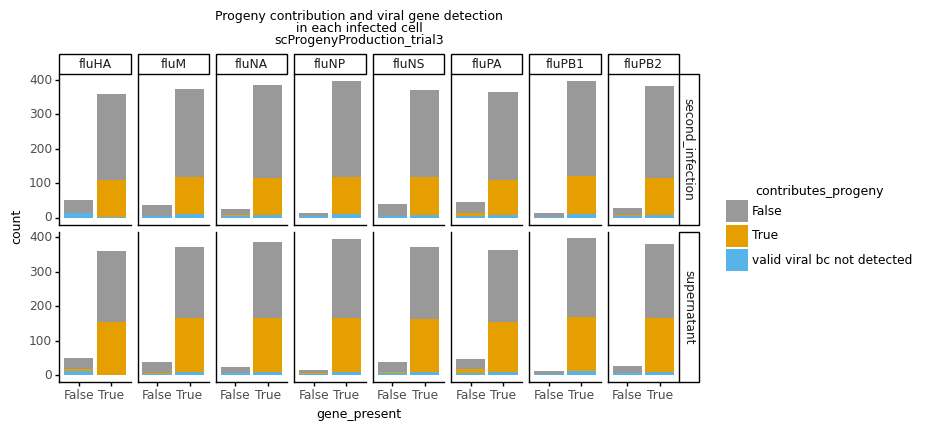

<ggplot: (8777418994673)>

In [25]:
progeny_contribution_by_gene = (
    p9.ggplot(infected_cells_genes_progeny,
              p9.aes(x='gene_present',
                     fill='contributes_progeny')) +
    p9.geom_bar(stat='count') +
    p9.facet_grid('source~gene') + 
    p9.ggtitle('Progeny contribution and viral gene detection\n'
               'in each infected cell\n'
               f'{expt}') +
    p9.theme(figure_size=(8, 4),
                plot_title=p9.element_text(size=9),
                axis_title=p9.element_text(size=9),
                legend_title=p9.element_text(size=9),
                legend_title_align='center') +
    p9.scale_fill_manual(CBPALETTE[0:])
)

display(progeny_contribution_by_gene)

### Count genes per cell
Count the number of viral genes called as present in each infected cell.

In [19]:
n_viral_genes_by_cell = (
    infected_cells_genes_progeny
    .query('gene_present == True')
    .groupby('cell_barcode')
    ['gene']
    .nunique()
    .reset_index()
    .rename(columns={'gene': 'n_viral_genes'}))

infected_cells_genes_progeny = pd.merge(
    left=infected_cells_genes_progeny,
    right=n_viral_genes_by_cell,
    on='cell_barcode',
    how='left'
)

display(infected_cells_genes_progeny)

,cell_barcode,gene,frac_gene_UMIs,gene_present,source,max_progeny_freq,contributes_progeny,n_viral_genes
0,AAACGAAGTAGACGTG,fluPB2,0.000024,True,second_infection,0.00001,False,8
1,AAACGAAGTAGACGTG,fluPB1,0.000362,True,second_infection,0.00001,False,8
2,AAACGAAGTAGACGTG,fluPA,0.000088,True,second_infection,0.00001,False,8
3,AAACGAAGTAGACGTG,fluHA,0.002566,True,second_infection,0.00001,False,8
4,AAACGAAGTAGACGTG,fluNP,0.004890,True,second_infection,0.00001,False,8
...,...,...,...,...,...,...,...,...
6555,TTTGGAGGTATCGTTG,fluHA,0.000619,True,supernatant,0.00179,True,8
6556,TTTGGAGGTATCGTTG,fluNP,0.002784,True,supernatant,0.00179,True,8
6557,TTTGGAGGTATCGTTG,fluNA,0.000300,True,supernatant,0.00179,True,8
6558,TTTGGAGGTATCGTTG,fluM,0.011110,True,supernatant,0.00179,True,8


Plot progeny contribution by n viral genes

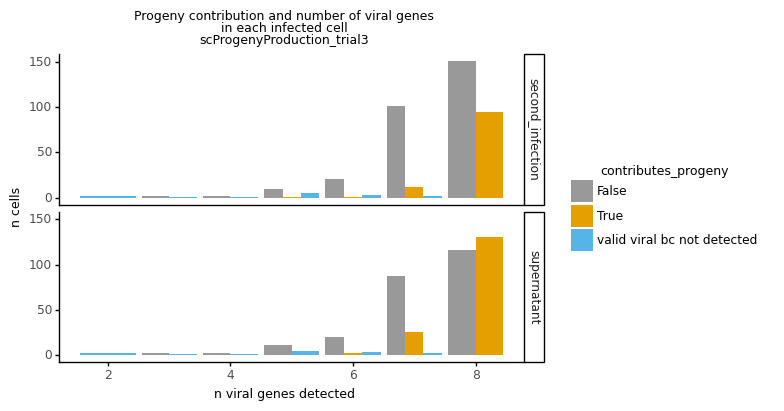

<ggplot: (8777418638189)>

In [33]:
n_viral_genes_histogram = (
    p9.ggplot((infected_cells_genes_progeny
               [['cell_barcode', 'source', 'n_viral_genes', 'contributes_progeny']]
               .drop_duplicates()),
              p9.aes(x='n_viral_genes',
                     fill='contributes_progeny')) +
    p9.geom_bar(stat='count', position='dodge') +
    p9.facet_grid('source~') + 
    p9.ggtitle('Progeny contribution and number of viral genes\n'
               'in each infected cell\n'
               f'{expt}') +
    p9.labs(x='n viral genes detected',
            y='n cells') +
    p9.theme(figure_size=(6, 4),
                plot_title=p9.element_text(size=9),
                axis_title=p9.element_text(size=9),
                legend_title=p9.element_text(size=9),
                legend_title_align='center') +
    p9.scale_fill_manual(CBPALETTE[0:])
)

display(n_viral_genes_histogram)

## Output
Export plot and n_viral_genes per infected cell CSV.

In [35]:
# save plot
print(f"Saving plot to {plot}")
p9.ggsave(plot=n_viral_genes_histogram, filename=plot, verbose=False)

Saving plot to results/viral_progeny/scProgenyProduction_trial3_viral_genes_progeny_relationship.pdf


Export CSV containing number of viral genes detected in each